In [1]:

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vatsalmavani/spotify-dataset


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/vatsalmavani/spotify-dataset
License(s): unknown
 30% 5.00M/16.5M [00:00<00:00, 42.0MB/s]
100% 16.5M/16.5M [00:00<00:00, 77.7MB/s]


In [2]:
!unzip spotify-dataset.zip

Archive:  spotify-dataset.zip
  inflating: data/data.csv           
  inflating: data/data_by_artist.csv  
  inflating: data/data_by_genres.csv  
  inflating: data/data_by_year.csv   
  inflating: data/data_w_genres.csv  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

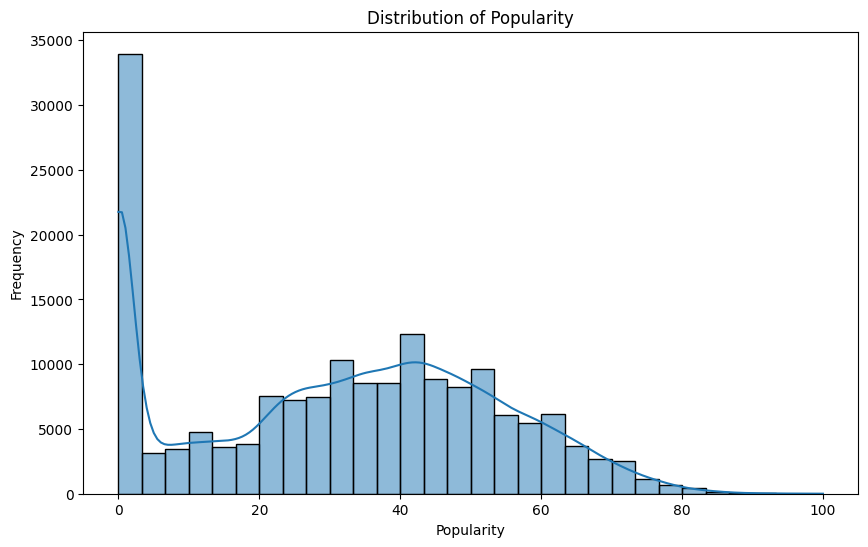

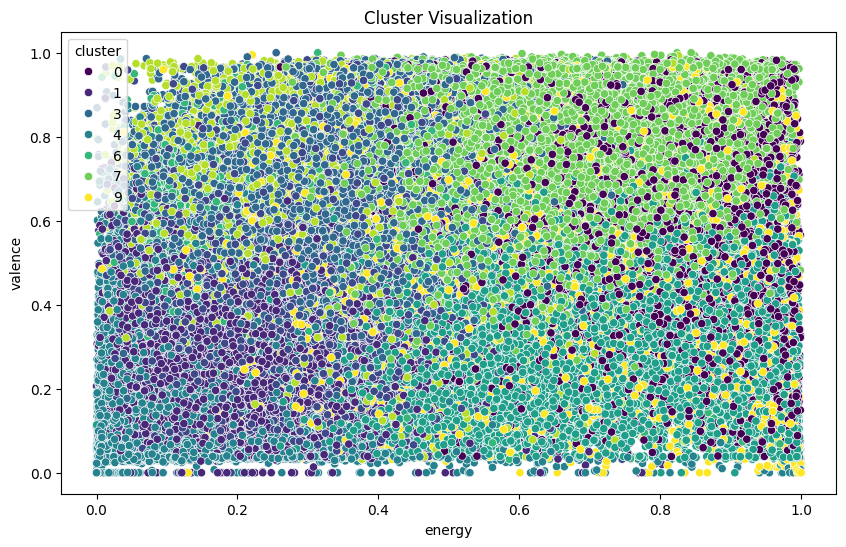

In [4]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

# Configure matplotlib
%matplotlib inline

# Suppress warnings
warnings.filterwarnings("ignore")

def load_data():
    """Load datasets from CSV files."""
    try:
        data = pd.read_csv("/content/data/data.csv")
        genre_data = pd.read_csv('/content/data/data_by_genres.csv')
        year_data = pd.read_csv('/content/data/data_by_year.csv')
        return data, genre_data, year_data
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None, None, None

def print_data_info(data):
    """Print information about the dataset."""
    print(data.info())

def visualize_data(data):
    """Generate visualizations for the dataset."""
    # Example visualization: Distribution of a feature
    plt.figure(figsize=(10, 6))
    sns.histplot(data['popularity'], bins=30, kde=True)
    plt.title('Distribution of Popularity')
    plt.xlabel('Popularity')
    plt.ylabel('Frequency')
    plt.show()

def preprocess_data(data):
    """Preprocess the data for clustering."""
    features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
    X = data[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

def perform_clustering(X, n_clusters=10):
    """Perform K-Means clustering."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans

def visualize_clusters(data, kmeans):
    data['cluster'] = kmeans.labels_
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='energy', y='valence', hue='cluster', data=data, palette='viridis')
    plt.title('Cluster Visualization')
    plt.show()

def main():
    # Load data
    data, genre_data, year_data = load_data()
    if data is None:
        return

    # Print data information
    print_data_info(data)

    # Visualize data
    visualize_data(data)

    # Preprocess data
    X_scaled = preprocess_data(data)

    # Perform clustering
    kmeans = perform_clustering(X_scaled)

    # Visualize clusters
    visualize_clusters(data, kmeans)

if __name__ == "__main__":
    main()
